In [1]:
import pandas as pd
import numpy as np
df0=pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220402.txt",delimiter=",")
df1=pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220409.txt",delimiter=",")
df2=pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220416.txt",delimiter=",")
df3=pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220423.txt",delimiter=",")
df4=pd.read_table("http://web.mta.info/developers/data/nyct/turnstile/turnstile_220430.txt",delimiter=",")
df=pd.concat([df0,df1,df2,df3,df4],ignore_index=True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,00:00:00,REGULAR,7697197,2683684
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,04:00:00,REGULAR,7697200,2683687
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,08:00:00,REGULAR,7697204,2683713
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,12:00:00,REGULAR,7697219,2683805
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/26/2022,16:00:00,REGULAR,7697278,2683874
...,...,...,...,...,...,...,...,...,...,...,...
1056703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/29/2022,05:00:00,RECOVR AUD,0,214
1056704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/29/2022,09:00:00,REGULAR,0,215
1056705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/29/2022,13:00:00,REGULAR,0,215
1056706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/29/2022,17:00:00,REGULAR,0,215


In [3]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [5]:
df['day'] = pd.to_datetime(df['DATE']).dt.day_name()

In [6]:
df["TURNSTILE"] = df["C/A"]+df["UNIT"]+df["SCP"]

In [7]:
df.drop(columns=["C/A","UNIT","SCP"],inplace=True)

In [8]:
df.describe()

,ENTRIES,EXITS
count,1.056708e+06,1.056708e+06
mean,4.278384e+07,3.444361e+07
std,2.231051e+08,1.966522e+08
min,0.000000e+00,0.000000e+00
25%,2.479680e+05,1.314768e+05
50%,1.353116e+06,8.839785e+05
75%,5.965710e+06,3.975777e+06
max,2.147309e+09,2.122390e+09


<AxesSubplot:>

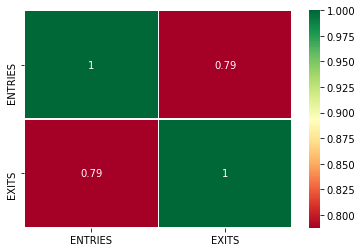

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [17]:
df['net_entry']= df.sort_values(['TURNSTILE','DATE'],ascending = (False, True)).groupby(['TURNSTILE'])['ENTRIES'].diff()
df['net_exits']= df.sort_values(['TURNSTILE','DATE'],ascending = (False, True)).groupby(['TURNSTILE'])['EXITS'].diff()

In [19]:
df['TRAFFIC'] = df['net_entry'] + df['net_exits']

In [22]:
(df[(df["net_entry"] < 0) |(df['net_exits']<0)].groupby(['TURNSTILE'])).size()

TURNSTILE
A011R08001-00-01       1
A011R08001-03-00     212
A015R08100-03-01       1
A038R08500-03-00       1
A049R08802-05-00     131
                    ... 
R532HR32802-03-05      1
R534R05501-05-00      10
R622R12300-00-00     209
R726R32900-00-00       1
R730R43100-00-04     187
Length: 157, dtype: int64

In [29]:
df_april=df.loc[(df["net_entry"] > 0) & (df['net_exits']>0)].reset_index(drop=True)

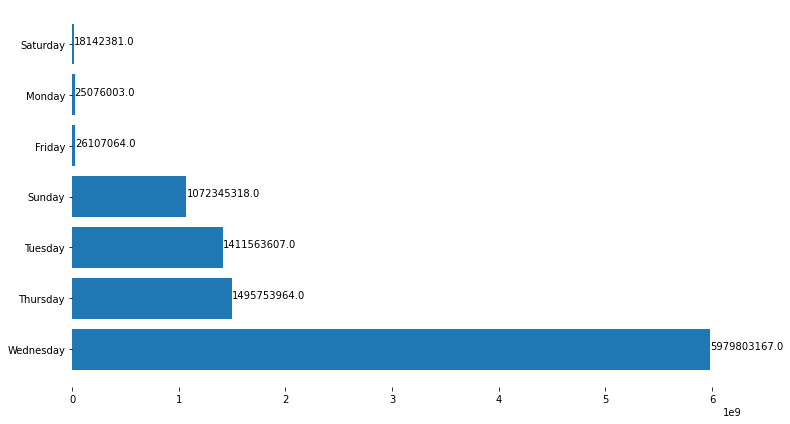

In [30]:
from matplotlib import pyplot as plt
week_day_traffic =pd.DataFrame(df_april.groupby('day')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize =(12, 7))
plt.box(False)
plt.barh(week_day_traffic['day'],week_day_traffic['TRAFFIC'])

for index, value in enumerate(week_day_traffic['TRAFFIC']):
    plt.text(value, index, str(value))


In [32]:
most_seven_station = pd.DataFrame(df_april.groupby('STATION')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_seven_station.head(7)

,STATION,TRAFFIC
0,HUNTS POINT AV,2.798336e+09
1,86 ST,2.492218e+09
2,34 ST-HERALD SQ,2.052825e+09
3,42 ST-PORT AUTH,1.470720e+09
4,QUEENS PLAZA,1.057426e+09
5,34 ST-PENN STA,4.493901e+06
6,GRD CNTRL-42 ST,3.616841e+06


In [33]:
most_crowded_hours = pd.DataFrame(df_april.groupby('TIME')['TRAFFIC'].sum().sort_values(ascending=False).reset_index())
most_crowded_hours.tail(15)

,TIME,TRAFFIC
25717,14:27:20,2.0
25718,04:34:32,2.0
25719,06:04:21,2.0
25720,22:26:16,2.0
25721,00:36:59,2.0
25722,07:02:48,2.0
25723,09:07:33,2.0
25724,04:38:21,2.0
25725,04:41:28,2.0
25726,22:20:18,2.0


In [34]:
top_seven =("HUNTS POINT AV","86 ST"	,"34 ST-HERALD SQ","42 ST-PORT AUTH","QUEENS PLAZA","34 ST-PENN STA","GRD CNTRL-42 ST")

In [35]:
top_seven_df = pd.DataFrame(df_april[df_april['STATION'].isin(top_seven)])
top_seven_df.sample(10)

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,TURNSTILE,TRAFFIC,net_entry,net_exits
22782,86 ST,N,BMT,03/26/2022,05:00:00,REGULAR,681768,275342,Saturday,D016R39700-03-01,15.0,9.0,6.0
820106,HUNTS POINT AV,6,IRT,04/29/2022,05:00:00,REGULAR,3760823,1431903,Friday,R412R14600-00-02,28.0,18.0,10.0
353696,86 ST,R,BMT,04/13/2022,12:00:00,REGULAR,146696,286962,Wednesday,C025R21500-00-00,433.0,190.0,243.0
808733,86 ST,456,IRT,04/24/2022,04:00:00,REGULAR,2445441,24100652,Sunday,R249R17901-00-09,146.0,7.0,139.0
445670,34 ST-PENN STA,123ACE,IRT,04/13/2022,14:00:00,REGULAR,2542363,1903327,Wednesday,R138R29300-02-03,204.0,114.0,90.0
463700,GRD CNTRL-42 ST,4567S,IRT,04/10/2022,13:00:00,REGULAR,2558786,6618841,Sunday,R236R04500-00-00,44.0,8.0,36.0
379085,42 ST-PORT AUTH,ACENQRS1237W,IND,04/13/2022,08:00:00,REGULAR,6002062,3018984,Wednesday,N063AR01100-00-03,630.0,562.0,68.0
207987,42 ST-PORT AUTH,ACENQRS1237W,IND,04/04/2022,00:00:00,REGULAR,12541903,43218844,Monday,N062R01101-00-00,401.0,68.0,333.0
80702,34 ST-HERALD SQ,BDFMNQRW,IND,04/01/2022,16:00:00,REGULAR,4268565,4265741,Friday,N505R02202-00-09,396.0,265.0,131.0
614565,34 ST-PENN STA,123ACE,IRT,04/17/2022,06:00:00,REGULAR,11925912,6135913,Sunday,R138R29300-00-01,34.0,13.0,21.0


In [36]:

df_top7_daily = top_seven_df.groupby(["STATION","day"]).sum()
week_day_traffic_heatmap =df_top7_daily.groupby(['day','STATION'])['TRAFFIC'].sum().reset_index()
week_day_traffic_heatmap = week_day_traffic_heatmap.groupby(["STATION","day"]).TRAFFIC.mean().reset_index()
df_top7_heatmap = week_day_traffic_heatmap.pivot("day","STATION","TRAFFIC")
df_top7_heatmap = df_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [37]:
df_top7_heatmap.head(10)


STATION,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,86 ST,GRD CNTRL-42 ST,HUNTS POINT AV,QUEENS PLAZA
day,,,,,,,
Monday,4.695250e+05,673605.0,3.905210e+05,4.544820e+05,566529.0,4.916900e+04,7.295200e+04
Tuesday,4.968700e+05,745840.0,4.224580e+05,1.385044e+09,638289.0,5.035600e+04,7.823000e+04
Wednesday,2.050134e+09,756520.0,4.336440e+05,1.105236e+09,647228.0,2.798091e+09,7.848900e+04
Thursday,5.292300e+05,753733.0,1.468502e+09,4.914050e+05,644382.0,4.844600e+04,7.675100e+04
Friday,5.177080e+05,688631.0,4.162050e+05,4.632970e+05,542409.0,4.544300e+04,6.944400e+04
Saturday,3.768490e+05,474186.0,3.000280e+05,2.946930e+05,321809.0,2.865800e+04,4.665300e+04
Sunday,3.015770e+05,401386.0,2.550480e+05,2.346780e+05,256195.0,2.258200e+04,1.057003e+09


Text(0.5, 1.0, 'Top 7 Busiest Stations / Day')

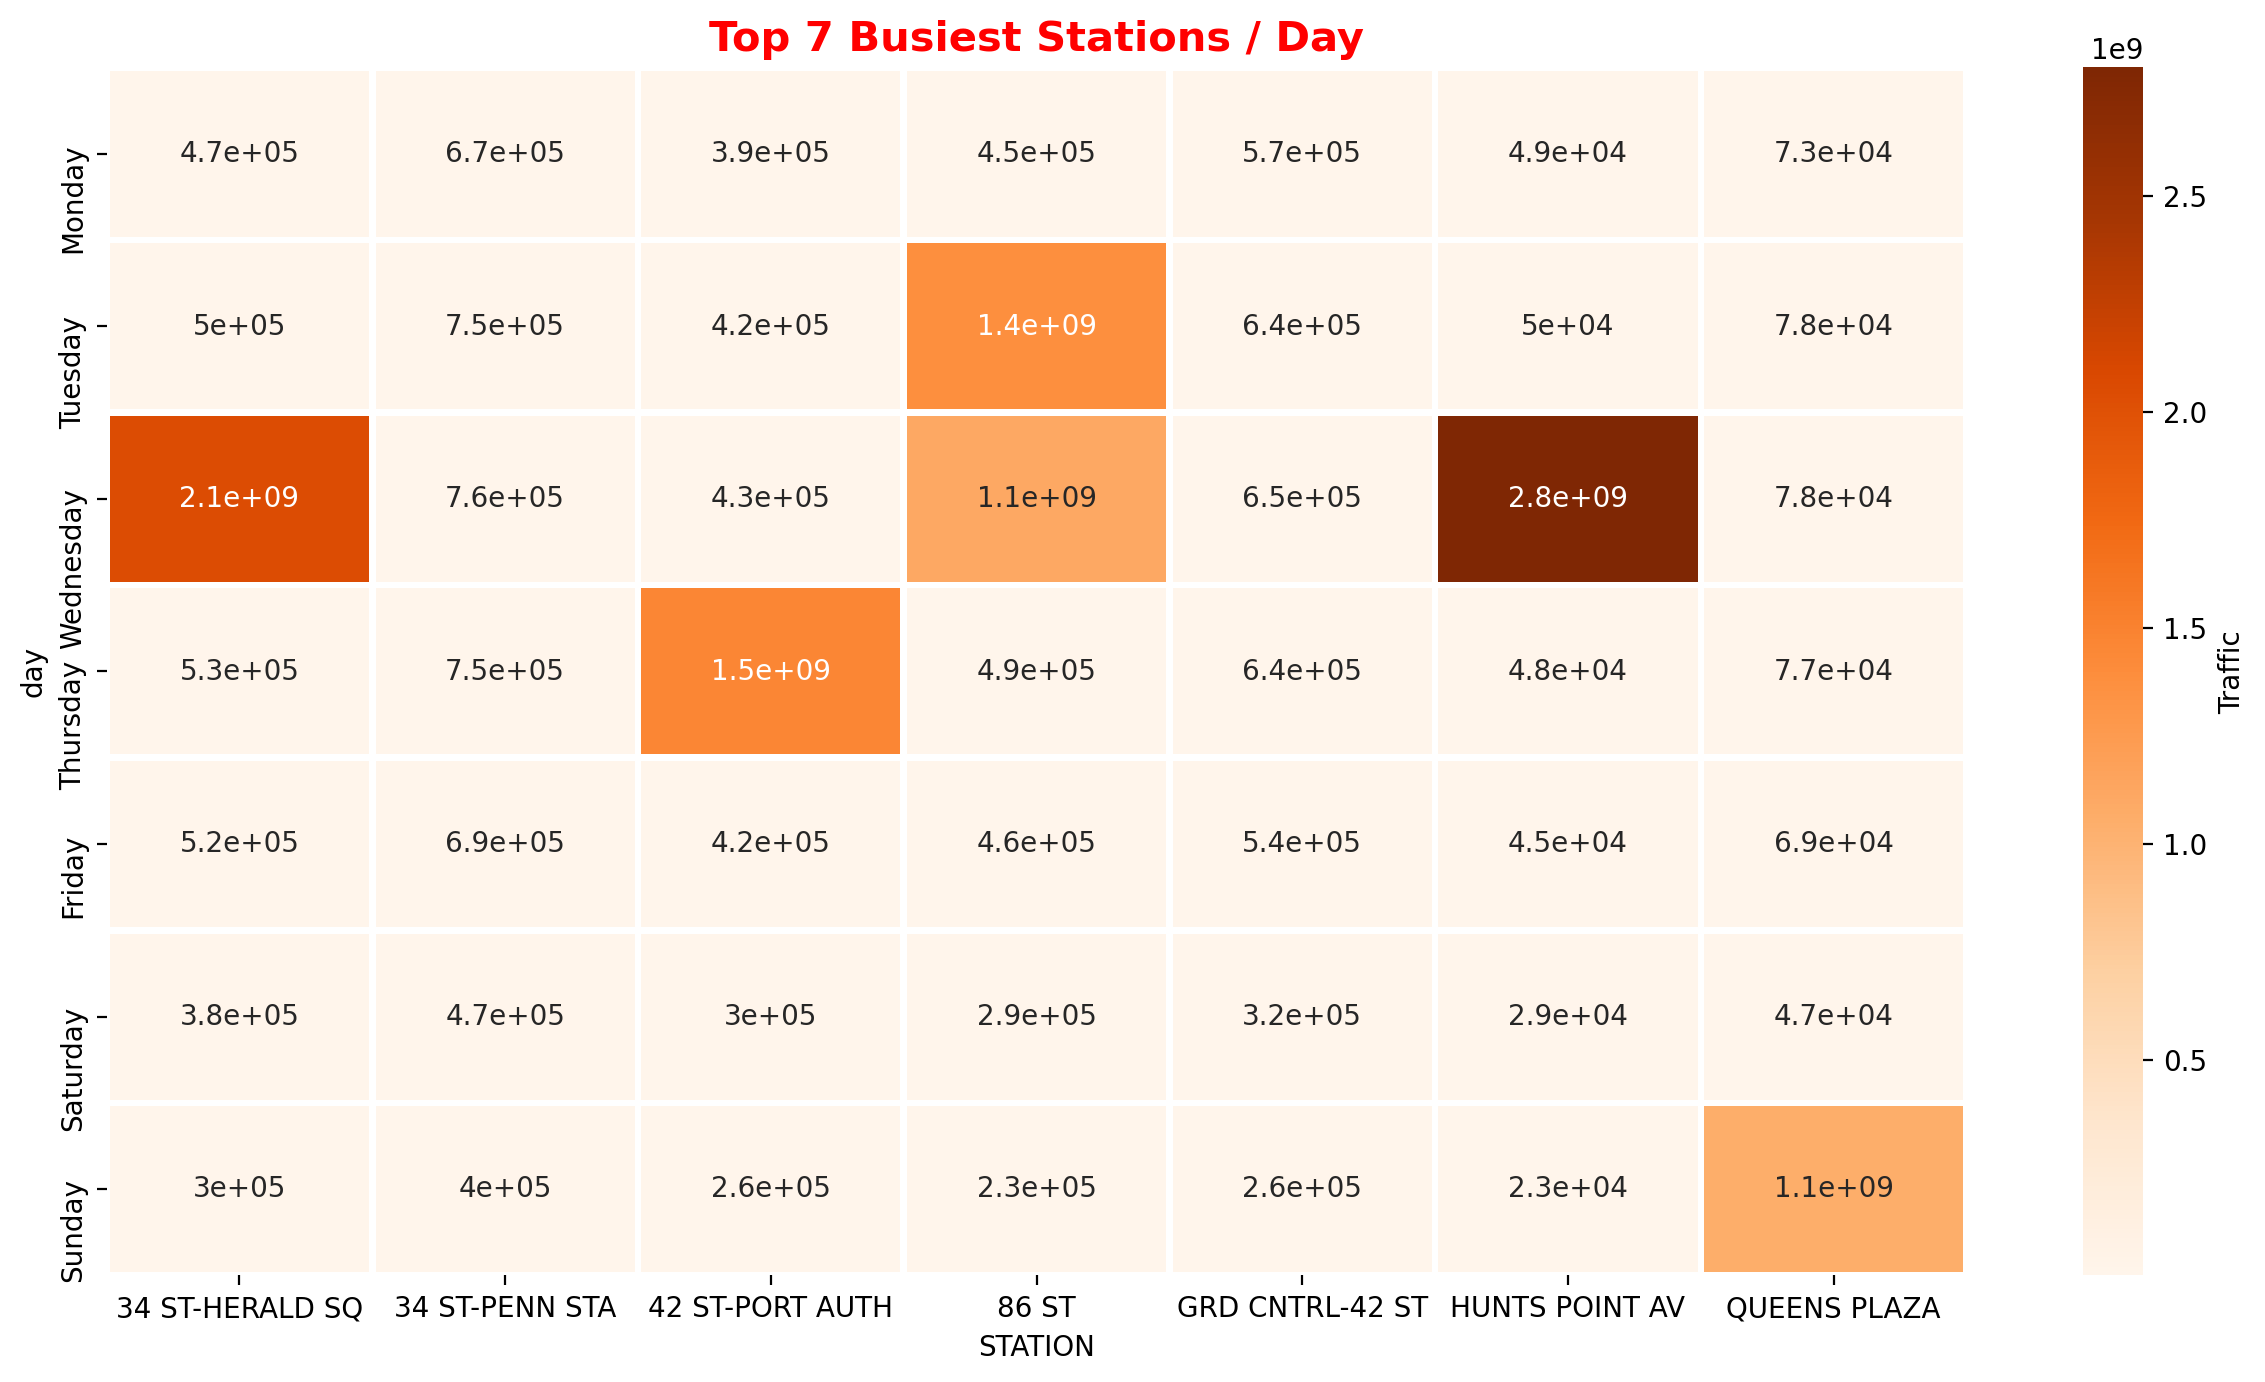

In [38]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(df_top7_heatmap,annot=True, linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="red", fontsize=15)

In [43]:
DF = df_april.groupby(['STATION'])['TRAFFIC'].sum().sort_values(ascending = False).head(5)
DF = pd.DataFrame(DF.reset_index())
DF

,STATION,TRAFFIC
0,HUNTS POINT AV,2.798336e+09
1,86 ST,2.492218e+09
2,34 ST-HERALD SQ,2.052825e+09
3,42 ST-PORT AUTH,1.470720e+09
4,QUEENS PLAZA,1.057426e+09


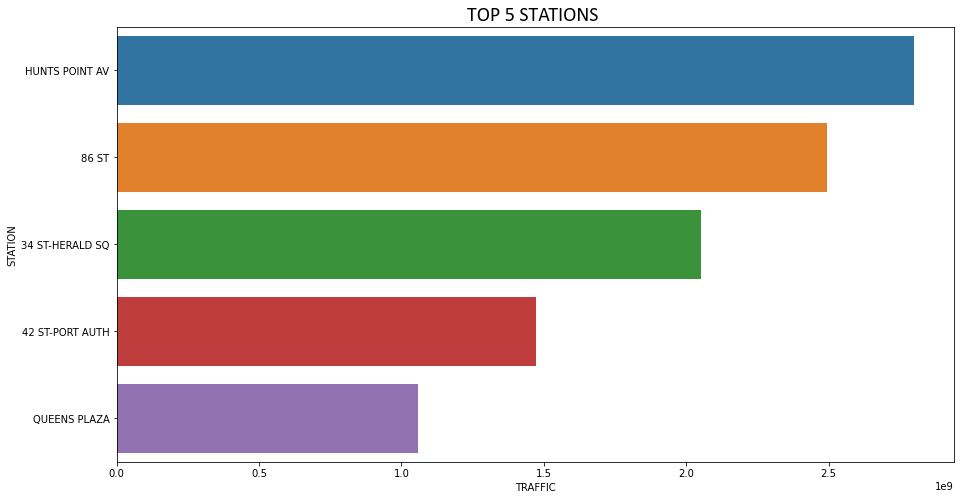

In [44]:
plt.figure(figsize=(15,8))
plt.title('TOP 5 STATIONS ',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = DF, y = DF.STATION, x = DF.TRAFFIC)
plt.show()

In [45]:
top5_stations = (df_april.groupby(['STATION'])['TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='TRAFFIC',ascending=False) 
                   .STATION.head())
top5_stations

247     HUNTS POINT AV
110              86 ST
59     34 ST-HERALD SQ
68     42 ST-PORT AUTH
323       QUEENS PLAZA
Name: STATION, dtype: object

In [46]:
top5_stations_traffic =df_april[df_april['STATION'].isin(top5_stations)].sort_values(by='TRAFFIC',ascending=False)
top5_stations_traffic.head()

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,day,TURNSTILE,TRAFFIC,net_entry,net_exits
650918,HUNTS POINT AV,6,IRT,04/20/2022,13:00:00,REGULAR,1073204120,2064368230,Wednesday,R412R14600-00-00,2.798042e+09,9.263405e+08,1.871701e+09
416300,34 ST-HERALD SQ,BDFMNQRW,IND,04/13/2022,12:00:00,REGULAR,1043925934,1009318822,Wednesday,N505R02202-06-00,2.049608e+09,1.041557e+09,1.008051e+09
209157,42 ST-PORT AUTH,ACENQRS1237W,IND,04/07/2022,16:00:00,REGULAR,1281668186,180190002,Thursday,N063AR01100-00-01,1.455305e+09,1.278711e+09,1.765941e+08
808596,86 ST,456,IRT,04/26/2022,20:00:00,REGULAR,1073692165,408716873,Tuesday,R249R17901-00-05,1.384572e+09,1.035962e+09,3.486097e+08
40806,86 ST,BC,IND,03/30/2022,16:00:00,REGULAR,552542562,552542516,Wednesday,N043R18600-06-01,1.104756e+09,5.523465e+08,5.524096e+08


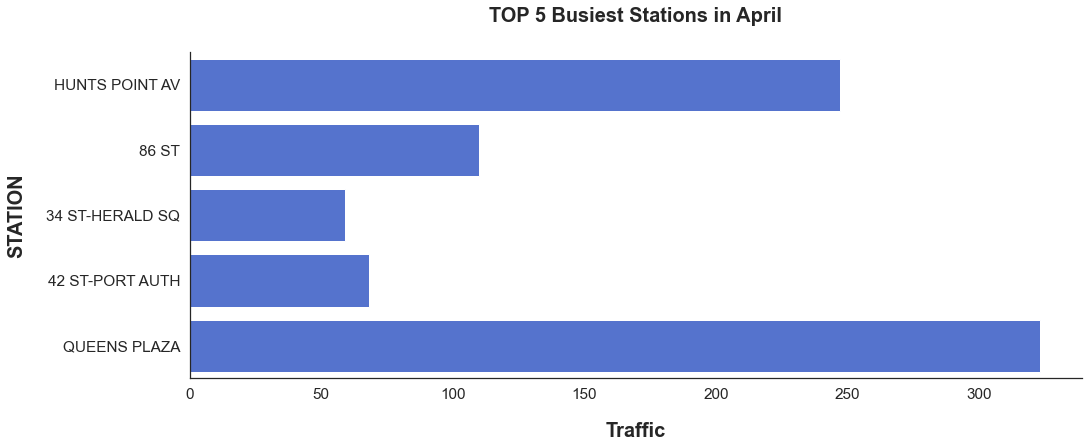

In [48]:
# plotting the top 5 busiest stations

sns.set(style="white", font_scale=1.4)
plt.figure(figsize=(16,6))

sns.barplot(x=top5_stations.index, y=top5_stations, color='royalblue')

plt.title('TOP 5 Busiest Stations in April', weight = 'bold', pad='30').set_fontsize('20')
plt.xlabel('Traffic', weight='bold', fontsize='20', labelpad=20)
plt.ylabel('STATION', weight='bold', fontsize='20', labelpad=20)

sns.despine()

